# 04 데이터를 한눈에: 주요 시각화 그래프
* 목표 : 시각화 기법의 개념, 효과, 구현 방법 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4.1 데이터 종류
* 정형 데이터는 수치형 데이터와 범주형 데이터로 나뉨
### 4.1.1 수치형 데이터
* 수치형 데이터(numerical data)
    * 사칙 연산이 가능하고 연산의 결과가 의미가 있는 데이터
    * 연속형 데이터(continuous data)
        * ex) 키, 몸무게, 수입
    * 이산형 데이터(discrete data)
        * ex) 과일 개수, 책의 페이지 수
### 4.1.2 범주형 데이터
* 범주형 데이터(categorical  data)
    * 범주를 나눌 수 있는 데이터
    * 순서형 데이터(ordinal data)
        * ex) 학점, 순위(랭킹)
    * 명목형 데이터(nominal data)
        * ex) 성별, 음식 종류, 우편 번호, 선수 번호

## 4.2 탐색적 데이터 분석과 그래프
* 그래프를 활용해 데이터의 구성, 중요한 피쳐, 제거할 피쳐, 새로운 피쳐 생성에 대한 정보 확인

## 4.3 수치형 데이터 시각화
* 수치형 데이터는 일정한 범위 내에서 어떻게 분포되어 있는지가 중요함
    * 데이터의 변환(transformation) 결정
    * 데이터의 활용 판단
* seaborn이 제공하는 주요 분포도 함수
    * histplot() : 히스토그램
    * kdeplot() : 커널밀도추정 함수 그래프
    * displot() : 분포도
    * rugplot() : 러그플롯

In [2]:
titanic = sns.load_dataset('titanic')

### 4.3.1 히스토그램(histplot)
* 히스토그램(histogram)
    * 수치형 데이터의 구간별 빈도수를 나타내는 그래프

<Axes: xlabel='age', ylabel='Count'>

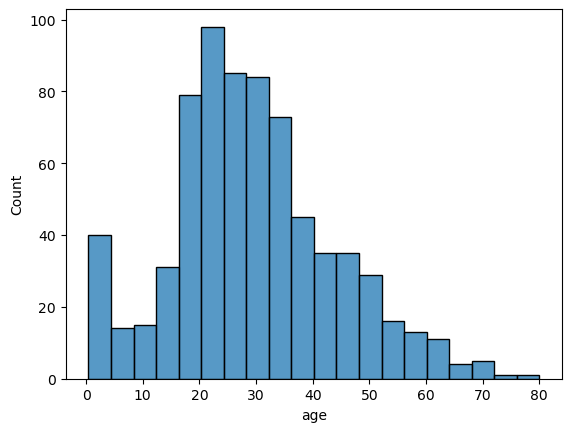

In [3]:
sns.histplot(data=titanic, x='age')

<Axes: xlabel='age', ylabel='Count'>

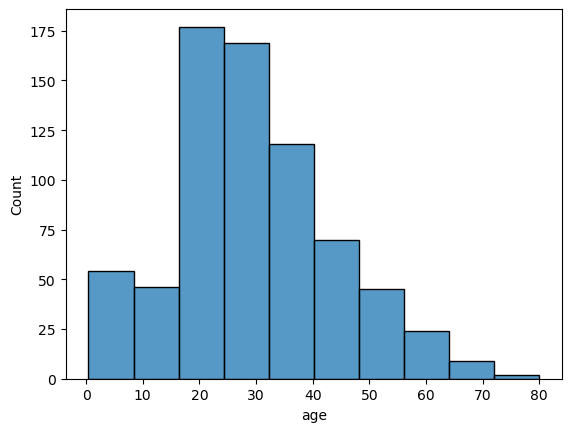

In [4]:
# 구간 조정: bins
sns.histplot(data=titanic, x='age', bins=10)

<Axes: xlabel='age', ylabel='Count'>

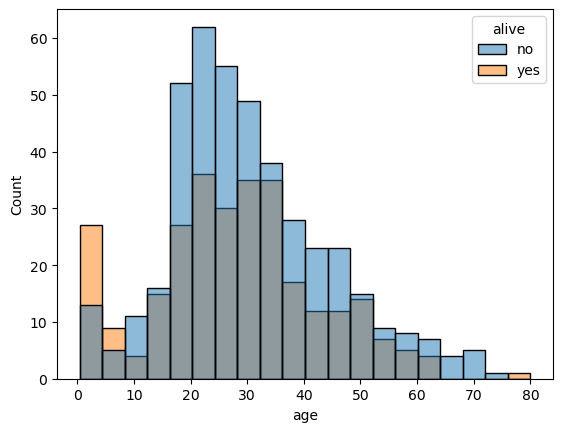

In [5]:
# 빈도를 특정 범주별로 구분 : hue
sns.histplot(data=titanic, x='age', hue='alive')

<Axes: xlabel='age', ylabel='Count'>

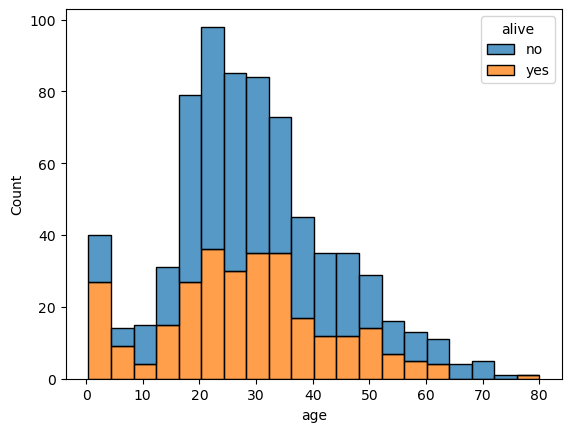

In [6]:
# hue 옵션을 누적해서 표시 : multiple
sns.histplot(data=titanic, x='age', hue='alive', multiple='stack')

### 4.3.2 커널밀도추정 그래프(kdeplot)
* kernel density estimation
* 데이터의 분포 형태 확인
* histogram과 겹침(histogram은 구간으로 나누고 kde는 연속적임)
* 개인적으로 데이터가 어떤 분포 모형을 갖고 있는지 알고자 할 때 잘 사용함

<Axes: xlabel='age', ylabel='Density'>

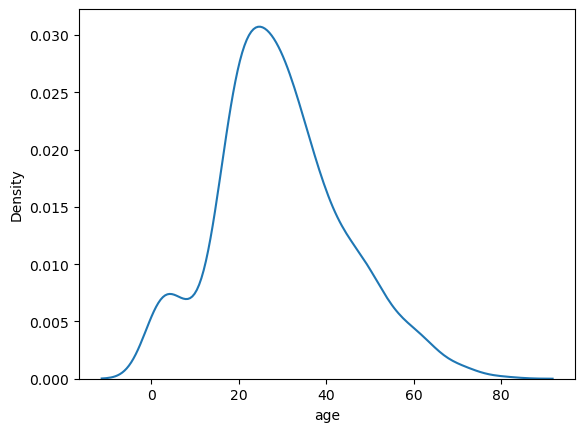

In [7]:
sns.kdeplot(data=titanic, x='age')

<Axes: xlabel='age', ylabel='Density'>

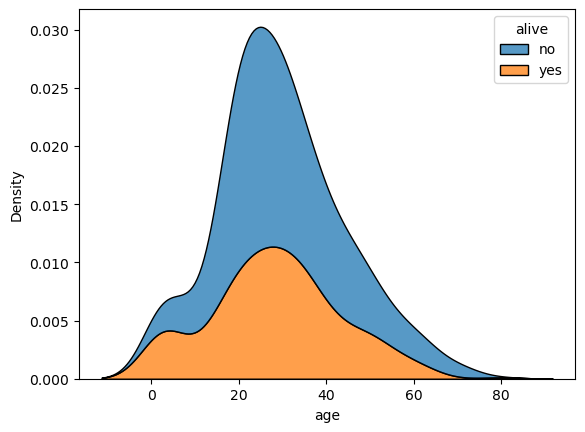

In [8]:
# hue 옵션과 multiple 옵션 적용
sns.kdeplot(data=titanic, x='age', hue='alive', multiple='stack')

### 4.3.3 분포도(displot)
* 옵션만 조정하면 histplot과 kdeplot이 제공하는 그래프를 모두 그릴 수 있음

C:\Users\dukim\miniconda3\envs\musthave_mldl_problem_solving_strategy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


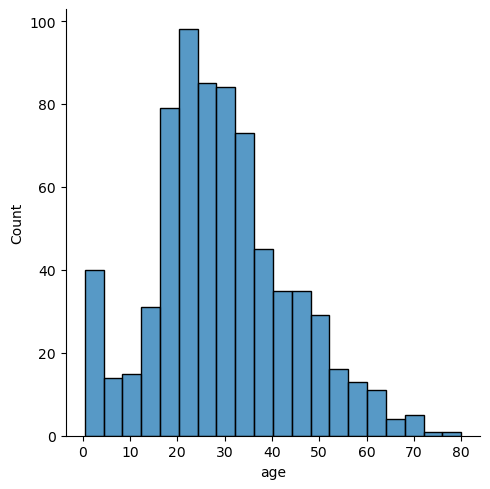

In [9]:
sns.displot(data=titanic, x='age')

C:\Users\dukim\miniconda3\envs\musthave_mldl_problem_solving_strategy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


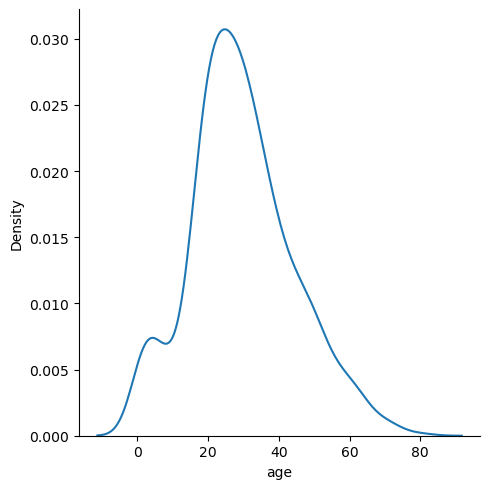

In [10]:
# kde 그리기
sns.displot(data=titanic, x='age', kind='kde')

C:\Users\dukim\miniconda3\envs\musthave_mldl_problem_solving_strategy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


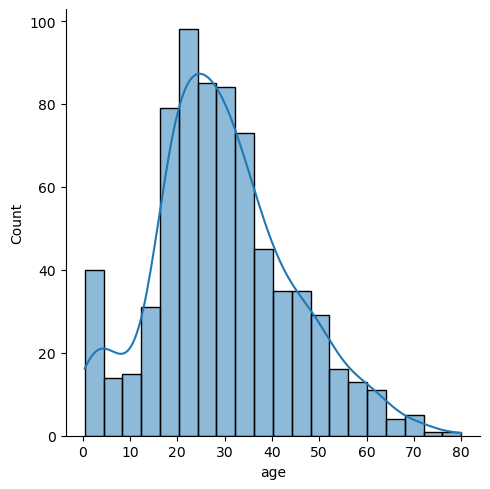

In [11]:
sns.displot(data=titanic, x='age', kde=True)

### 4.3.4 러그플롯(rugplot)
* 주변 분포(marginal distribution)를 나타내는 그래프
* 주로 다른 분포도 그래프와 함께 사용

<Axes: xlabel='age', ylabel='Density'>

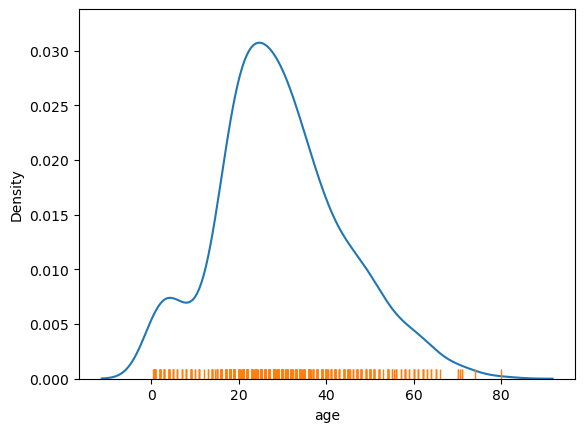

In [12]:
sns.kdeplot(data=titanic, x='age')
sns.rugplot(data=titanic, x='age')

<Axes: xlabel='age'>

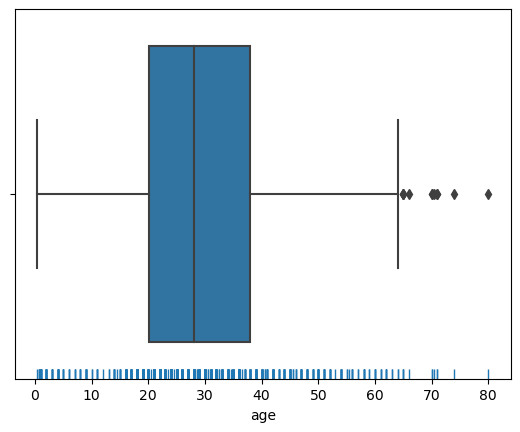

In [13]:
sns.boxplot(data=titanic, x='age')
sns.rugplot(data=titanic, x='age')

## 4.4 범주형 데이터 시각화
* 막대 그래프, 포인트플롯, 박스플롯, 바이올린플롯, 카운트 플롯

### 4.4.1 막대 그래프(bar plot)
* 평균과 신뢰구간을 그려줌
* 원본 데이터를 복원 샘플링하여 얻은 표본을 활용

<Axes: xlabel='class', ylabel='fare'>

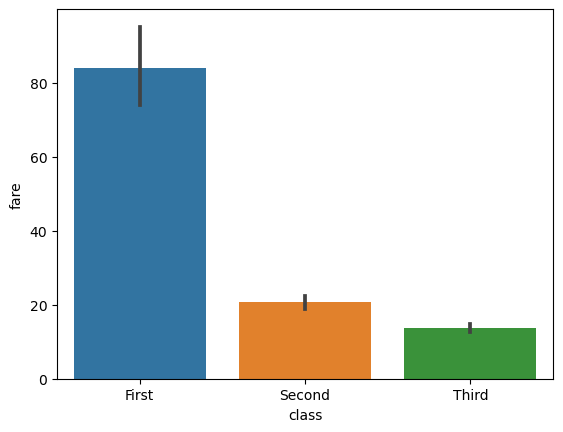

In [14]:
sns.barplot(data=titanic, x='class', y='fare')

### 4.4.2 포인트플롯(pointplot)
* 막대 그래프와 동일한 정보 제공

<Axes: xlabel='class', ylabel='fare'>

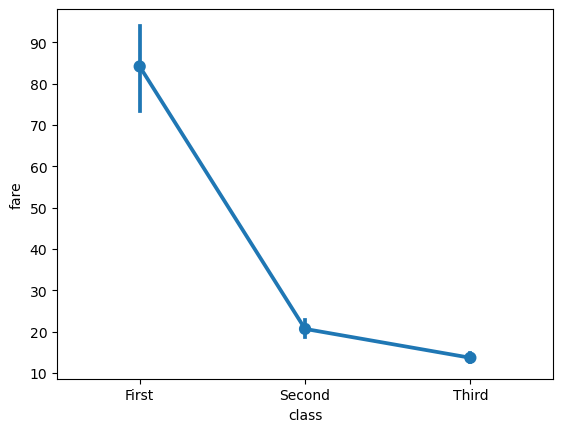

In [15]:
sns.pointplot(data=titanic, x='class', y='fare')

In [16]:
# 한 화면에 여러개를 그릴때 좋음
url = 'https://github.com/DSNote/fastcampus/raw/main/bike.csv'
bike_df = pd.read_csv(url)
month_s = pd.to_datetime(bike_df['datetime']).dt.month
bike_df['hour'] = pd.to_datetime(bike_df['datetime']).dt.hour
bike_df['season'] = month_s.apply(lambda x: 'winter' if x==12 else 'fall' if x>=9 else 'summer' if x>=6 else 'spring' if x>=3 else 'winter')
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,hour,season
0,2018-01-01 0:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,NaN,NaN,20,Clouds,0,winter
1,2018-01-01 1:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,NaN,NaN,1,Clear,1,winter
2,2018-01-01 2:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,NaN,NaN,1,Clear,2,winter
3,2018-01-01 3:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,NaN,NaN,1,Clear,3,winter
4,2018-01-01 4:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,NaN,NaN,1,Clear,4,winter


<Axes: xlabel='hour', ylabel='count'>

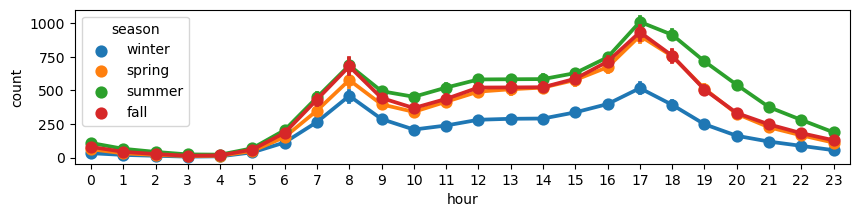

In [17]:
plt.figure(figsize=(10,2))
sns.pointplot(data=bike_df, x='hour', y='count', hue='season')

<Axes: xlabel='hour', ylabel='count'>

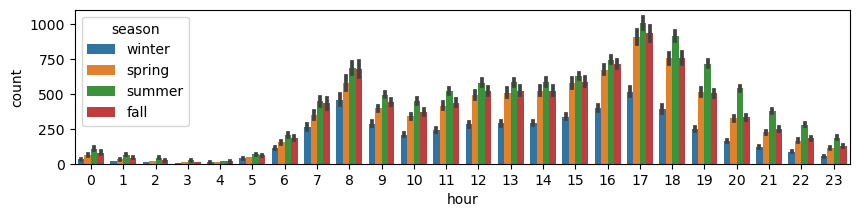

In [18]:
plt.figure(figsize=(10,2))
sns.barplot(data=bike_df, x='hour', y='count', hue='season')

### 4.4.3 박스플롯(boxplot)
* 5가지 요약 수치 제공
    * 최소값
    * 제 1사분위 수(Q1)
    * 제 2사분위 수(Q2)
    * 제 3사분위 수(Q3)
    * 최대값
    * ![boxplot](images/boxplot.PNG)

<Axes: xlabel='class', ylabel='age'>

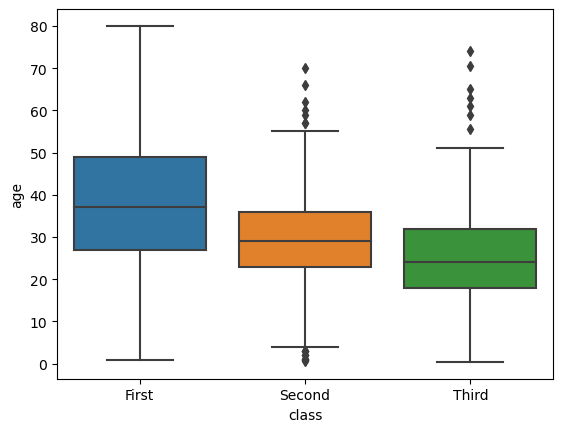

In [19]:
sns.boxplot(data=titanic, x='class', y='age')

### 4.4.4 바이올린플롯(violinplot)
* 박스플롯과 커널밀도추정 함수를 합쳐 놓은 그래프
* ![violinplot](images/violin.png)

<Axes: xlabel='class', ylabel='age'>

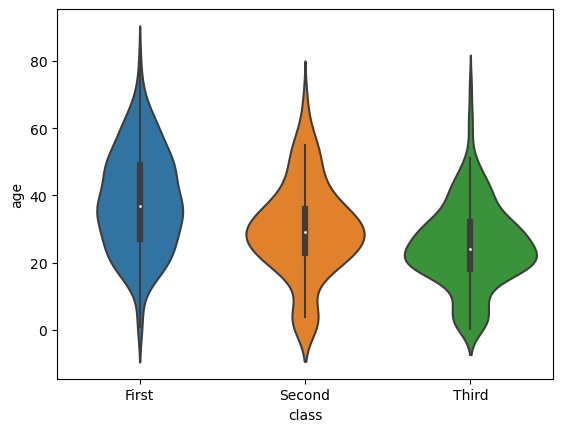

In [20]:
sns.violinplot(data=titanic, x='class', y='age')

<Axes: xlabel='class', ylabel='age'>

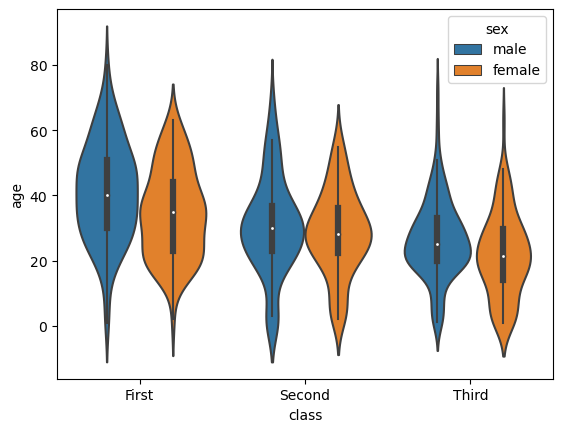

In [21]:
sns.violinplot(data=titanic, x='class', y='age', hue='sex')

<Axes: xlabel='class', ylabel='age'>

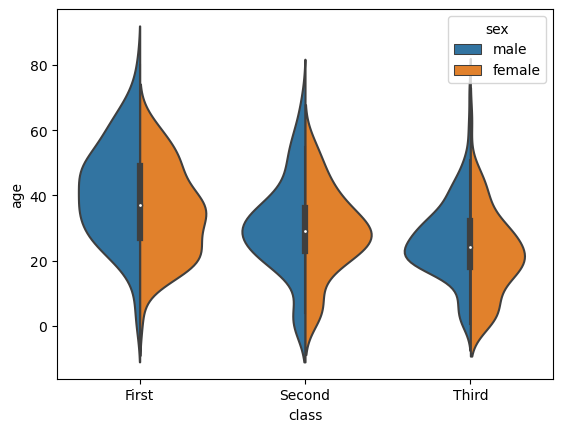

In [22]:
sns.violinplot(data=titanic, x='class', y='age', hue='sex', split=True)

### 4.4.5 카운트플롯(countplot)
* 범주형 데이터의 개수 확인

<Axes: xlabel='class', ylabel='count'>

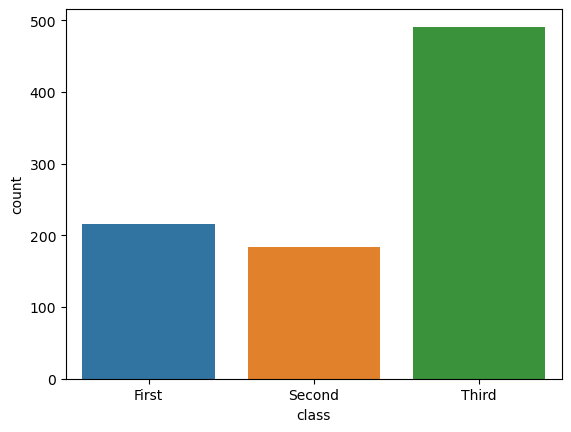

In [23]:
sns.countplot(data=titanic, x='class')

<Axes: xlabel='count', ylabel='class'>

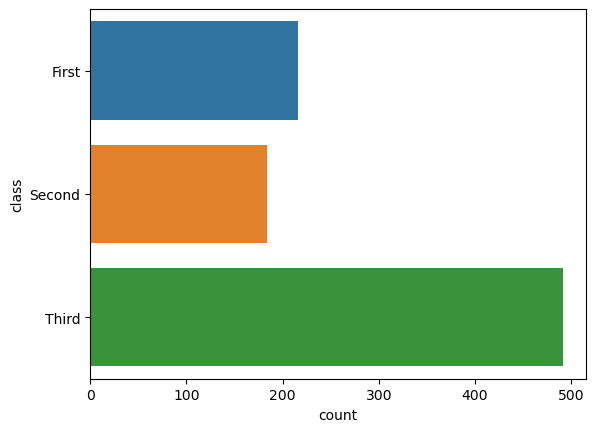

In [24]:
# 가로로 보기
sns.countplot(data=titanic, y='class')

* barplot vs. countplot
    * barplot
        * 범주형 데이터별 수치형 데이터의 평균
        * 평균 이외에 중앙값, 최댓값, 최소값 표시 가능
    * countplot - 범주형 데이터의 개수

<Axes: xlabel='class', ylabel='fare'>

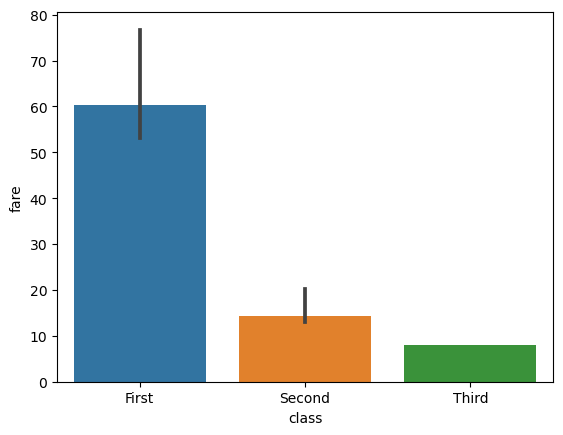

In [25]:
sns.barplot(data=titanic, x='class', y='fare', estimator=np.median) # 중앙값

<Axes: xlabel='class', ylabel='fare'>

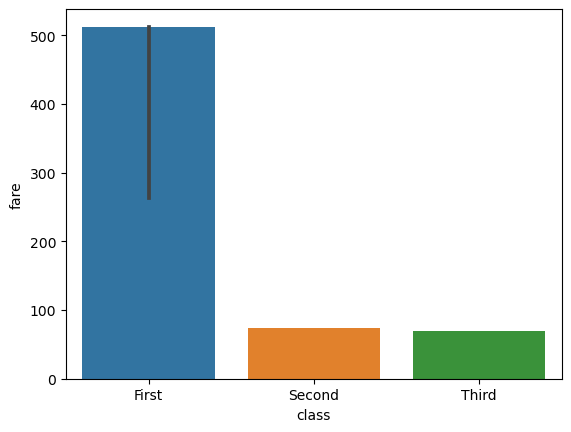

In [26]:
sns.barplot(data=titanic, x='class', y='fare', estimator=np.max) # 최대값

<Axes: xlabel='class', ylabel='fare'>

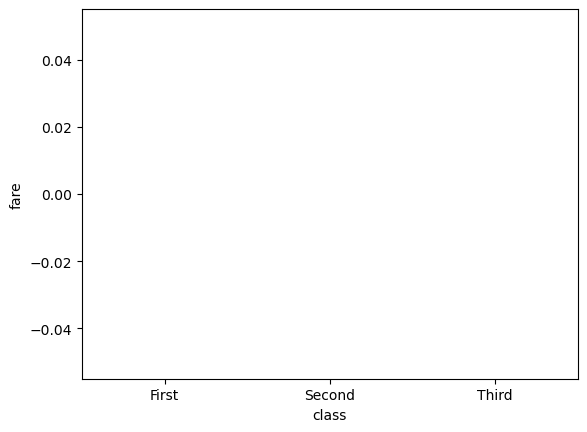

In [27]:
sns.barplot(data=titanic, x='class', y='fare', estimator=np.min) # 최솟값

### 4.4.6 파이 그래프(pie
* 범주형 데이터별 비율 표시
* seaborn에서는 지원하지 않아 matplotlib를 사용해야 함

In [28]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
titanic['n_alive'] = titanic.alive.apply(lambda al: True if al=='yes' else False)
alive_per_class = titanic.groupby('class')['n_alive'].sum()
alive_per_class

class
First     136
Second     87
Third     119
Name: n_alive, dtype: int64

([<matplotlib.patches.Wedge at 0x231bfab6710>,
 [Text(0.34759742562046436, 1.043635966083014, 'First'),
  Text(-1.086614775833759, -0.17107989051828945, 'Second'),
  Text(0.5056815692248013, -0.9768757088526373, 'Third')],
 [Text(0.18959859579298052, 0.5692559814998257, '39.8%'),
  Text(-0.5926989686365958, -0.09331630391906696, '25.4%'),
  Text(0.2758263104862552, -0.5328412957378021, '34.8%')])

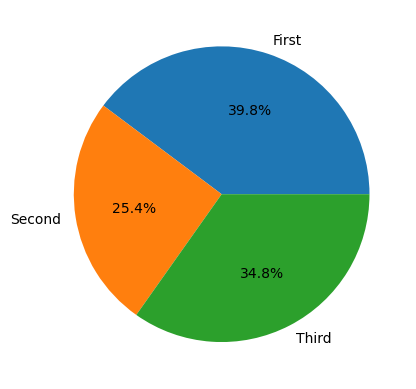

In [30]:
plt.pie(x=alive_per_class, labels=alive_per_class.index, autopct='%.1f%%')

## 4.5 데이터 관계 시각화
### 4.5.1 히트맵(heatmap)
* 데이터간 관계를 색상으로 표현한 그래프

In [31]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [32]:
# 각 연도별 월별 탑승자 수
flights_pivot = flights.pivot(
    index='month',
    columns='year',
    values='passengers'
)
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

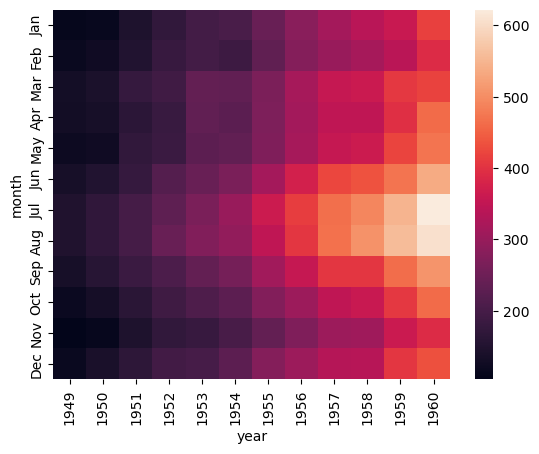

In [33]:
sns.heatmap(data=flights_pivot)

In [34]:
# 현재 데이터에서는 pivot 과 결과는 동일하지만 실제로는 pivot_table에는 통계 정보(aggfunc)가 들어감
# 지금은 열과 행에 해당하는 데이터가 하나라 동일함
flights_pivot_table = flights.pivot_table(
    index='month',
    columns='year',
    values='passengers',
    aggfunc='sum'
)
flights_pivot_table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


### 4.5.2 라인플롯(lineplot)
* 두 수치형 데이터 사이의 관계를 나타낼 때 사용
* x 파라미터에 해당하는 y 파라미터에 전달한 값의 평균과 95% 신뢰구간을 나타냄

<Axes: xlabel='year', ylabel='passengers'>

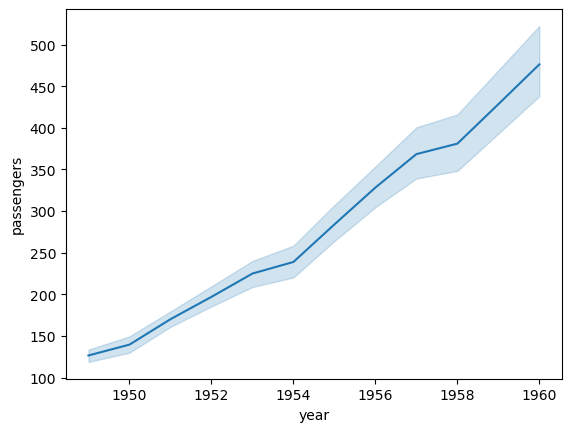

In [35]:
sns.lineplot(data=flights, x='year', y='passengers')

<Axes: xlabel='year', ylabel='passengers'>

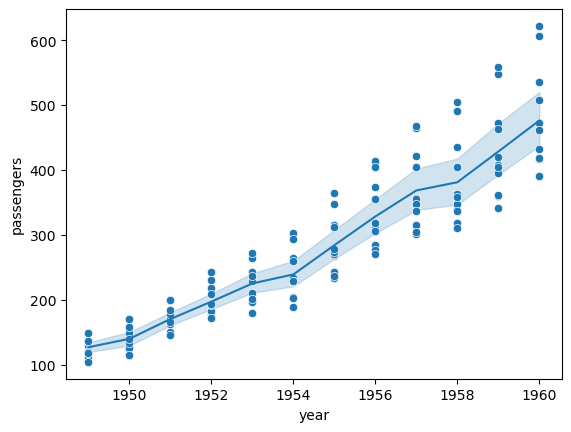

In [36]:
sns.lineplot(data=flights, x='year', y='passengers')
sns.scatterplot(data=flights, x='year', y='passengers')

### 4.5.3 산점도(scatterplot)
* 두 데이터의 관계를 점으로 표현하는 그래프

In [37]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

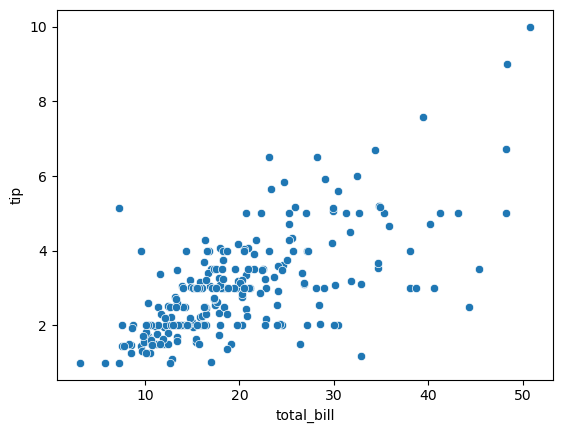

In [38]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

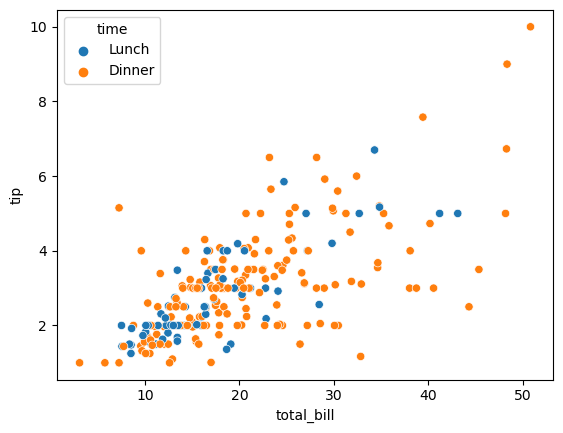

In [39]:
# time에 따른 분류 추가
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

### 4.5.4 회귀선을 포함한 산점도 그래프(regplot)
* 산점도와 선형 회귀선을 동시에 그려주는 함수

<Axes: xlabel='total_bill', ylabel='tip'>

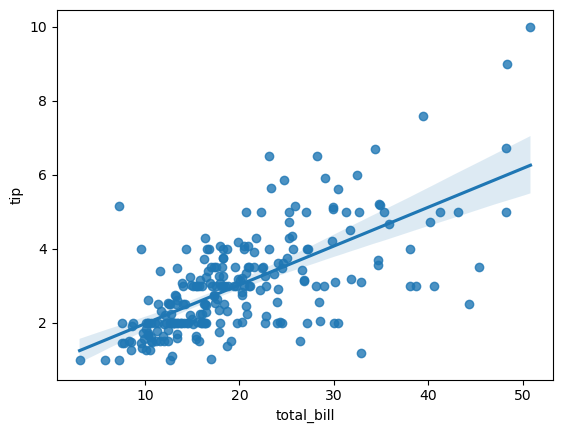

In [40]:
sns.regplot(data=tips, x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

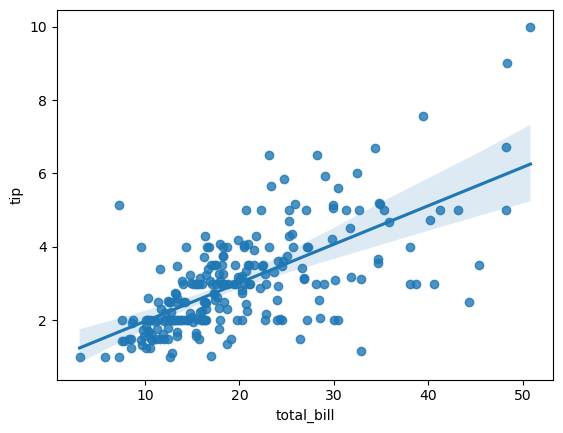

In [41]:
# 신뢰구간 99%
sns.regplot(data=tips, x='total_bill', y='tip', ci=99)